# Trabajo Práctico de Redes Neuronales


## Descripción

Craigslist es la colección de vehículos usados ​​a la venta más grande del mundo. El conjunto de datos contiene toda la información de los vehículos, como modelo, año, estado, cilindros, conducción, tamaño, color de pintura, precio, etc.

*DEFINICION DE COLUMNAS*


ETIQUETA
*   'price': 'precio' 

ATRIBUTOS


* 'id': 'identificacion',
* 'url': 'url',
*                      'region':'region',
*                      'region_url':'region_url',
*                      'year': 'año',
*                      'manufacturer':'fabricante',
*                      'model':'modelo',
*                      'condition':'condicion',
*                      'cylinders':'cilindros',
*                      'fuel':'combustible',
*                      'odometer':'cuenta_kilometros',
*                      'title_status':'title_status',
*                      'transmission':'transmission',
*                      'VIN':'VIN',
*                      'drive':'conducir',
*                      'size':'tamaño',
*                      'type':'tipo',
*                      'paint_color':'color_pintura',
*                      'image_url':'url_imagen',
*                      'description':'discripcion',
*                      'county':'condado',
*                      'state':'estado',
*                      'lat':'lat',
*                      'long':'largo',
*                      'posting_date':'fecha_publicacion',


## Objetivo
Predecir, a través del uso de una **Red Neuronal**, el **precio** de los vehículos

# Importando Librerias

In [2]:
!pip install --upgrade plotly 

  Attempting uninstall: plotly
    Found existing installation: plotly 5.3.1
    Uninstalling plotly-5.3.1:
      Successfully uninstalled plotly-5.3.1


In [3]:
!pip3 install keras-visualizer

In [4]:
from keras_visualizer import visualizer 

In [5]:
pip install pylot

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask-simplelogin 0.0.7 requires Flask>=0.12, but you have flask 0.10.1 which is incompatible.
dash 1.20.0 requires Flask>=1.0.4, but you have flask 0.10.1 which is incompatible.
dash-auth 1.4.1 requires Flask>=1.0.2, but you have flask 0.10.1 which is incompatible.



  Created wheel for pylot: filename=Pylot-0.0.1-py3-none-any.whl size=21269 sha256=b75368148d4c675597386c0e4b6a2dd46a76ff16913e6b744c10a048baae67a2
  Stored in directory: c:\users\cecim\appdata\local\pip\cache\wheels\ad\33\48\17d76a9122f55246b0952bf56a824dc1a3493e2d00ee944c25
  Created wheel for Active-SQLAlchemy: filename=Active_SQLAlchemy-0.3.2-py3-none-any.whl size=7996 sha256=0fb6d68b950d3209f4e69390f51d1f6faf9059bceef9bbcf75486552487572aa
  Stored in directory: c:\users\cecim\appdata\local\pip\cache\wheels\64\2b\1c\09838d486046c9c656a25debb86251dd7ddce52bdd66a5c779
  Created wheel for Flask: filename=Flask-0.10.1-py3-none-any.whl size=116106 sha256=9cf03e3a842704c8dc8e563d8b1f81b96504b5354bd8782059c072068a9d26dd
  Stored in directory: c:\users\cecim\appdata\local\pip\cache\wheels\1b\32\75\6205480d3e78221888ce99a3717fa349d373b256329408b289
  Created wheel for Flask-Assets: filename=Flask_Assets-0.10-py3-none-any.whl size=7492 sha256=c26c27112402e7f9ea9d8acca5af249c78c2b8351e4ce249

In [6]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install colorama

In [9]:
pip install folium 

Note: you may need to restart the kernel to use updated packages.


In [1]:
import io
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import folium
import math
import plotly.express as px
import plotly.graph_objects as go
sns.set()

In [2]:
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
from string import ascii_letters
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from geopy.geocoders import Nominatim
from string import ascii_letters
from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA

In [3]:
pd.set_option('display.max.columns', 100) 
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# EDA

## 1.Obtener los datos

In [4]:
df = pd.read_csv("vehicles.csv") 

In [5]:
df.head()

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders fuel  odometer title_status  \
0          NaN   NaN       NaN       NaN  NaN       NaN          NaN   
1          NaN   NaN       NaN       NaN  NaN       NaN          NaN   
2          NaN   NaN       NaN       NaN  NaN       NaN          NaN   
3          NaN   NaN       NaN       NaN  NaN       NaN          NaN   
4          NaN   NaN       NaN       NaN  NaN       NaN          NaN   

  transmission  VIN drive size type paint_color image_url description  county  \
0          NaN  NaN   NaN  NaN  NaN         NaN       NaN         NaN     NaN   
1          NaN  NaN   NaN  NaN  NaN         NaN       NaN         NaN     NaN   
2          NaN  NaN   NaN  NaN  NaN         NaN       NaN         NaN     NaN   
3          NaN  NaN   NaN  NaN  NaN         NaN       NaN         NaN     NaN   
4          NaN  NaN   NaN  NaN  NaN         NaN       NaN         NaN     NaN   

  state  lat  long posting_date  
0    az  NaN   NaN          NaN  
1    ar  NaN   NaN          NaN  
2    fl  NaN   NaN          NaN  
3    ma  NaN   NaN          NaN  
4    nc  NaN   NaN          NaN

In [8]:
print('Cantidad de filas:',df.shape[0],'\nCantidad de columnas:', df.shape[1])

Cantidad de filas: 426880 
Cantidad de columnas: 26


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [9]:
for col in df.select_dtypes(['object']).columns:
  print(col, '\n')
  print('Cantidad de valores unicos: ', df[col].nunique())
  if df[col].nunique()<15:
    print(df[col].value_counts())
  print('---------------------------------------\n')

url 

Cantidad de valores unicos:  426880
---------------------------------------

region 

Cantidad de valores unicos:  404
---------------------------------------

region_url 

Cantidad de valores unicos:  413
---------------------------------------

manufacturer 

Cantidad de valores unicos:  42
---------------------------------------

model 

Cantidad de valores unicos:  29667
---------------------------------------

condition 

Cantidad de valores unicos:  6
good         121456
excellent    101467
like new      21178
fair           6769
new            1305
salvage         601
Name: condition, dtype: int64
---------------------------------------

cylinders 

Cantidad de valores unicos:  8
6 cylinders     94169
4 cylinders     77642
8 cylinders     72062
5 cylinders      1712
10 cylinders     1455
other            1298
3 cylinders       655
12 cylinders      209
Name: cylinders, dtype: int64
---------------------------------------

fuel 

Cantidad de valores unicos:  5
gas         3

In [25]:
def freq_models(marcas, df):
    frames = []
    
    for i,marca in enumerate(marcas):
        dff = df[df['manufacturer'] == marca]
        model = dff['model'].value_counts()
        model_f = model.iloc[0:10]
        df1 = model_f.to_frame()
        df1["manufacturer"] = marca
        frames.append(df1)
    
    result = pd.concat(frames)
    result=result.reset_index()
    result.columns=['model', 'quantity model', 'manufacturer']
    
    return result

In [26]:
marcas = ['ford','chevrolet','toyata','honda','nissan','jeep','dodge','gmc','hyundai','ram']
df_models_count = freq_models(marcas, df)
df_models_count

model  quantity model manufacturer
0                          f-150            8009         ford
1                         escape            2745         ford
2                       explorer            2499         ford
3                        mustang            2220         ford
4                         fusion            1979         ford
..                           ...             ...          ...
85                   pickup 1500             341          ram
86                   pickup 2500             202          ram
87                          5500             184          ram
88                      1500 4x4             181          ram
89  1500 quad cab harvest pickup             174          ram

[90 rows x 3 columns]

In [27]:
fig =px.sunburst(df_models_count, path=['manufacturer','model'],values='quantity model', color='manufacturer')
fig.update_layout(margin=dict(t=1, b=1, r=1, l=1))
fig.show()

## 2.Preprocesar los datos

In [29]:
df.head()

id                                                url  \
0  7222695916  https://prescott.craigslist.org/cto/d/prescott...   
1  7218891961  https://fayar.craigslist.org/ctd/d/bentonville...   
2  7221797935  https://keys.craigslist.org/cto/d/summerland-k...   
3  7222270760  https://worcester.craigslist.org/cto/d/west-br...   
4  7210384030  https://greensboro.craigslist.org/cto/d/trinit...   

                   region                         region_url  price  year  \
0                prescott    https://prescott.craigslist.org   6000   NaN   
1            fayetteville       https://fayar.craigslist.org  11900   NaN   
2            florida keys        https://keys.craigslist.org  21000   NaN   
3  worcester / central MA   https://worcester.craigslist.org   1500   NaN   
4              greensboro  https://greensboro.craigslist.org   4900   NaN   

  manufacturer model condition cylinders fuel  odometer title_status  \
0          NaN   NaN       NaN       NaN  NaN       NaN          NaN   
1          NaN   NaN       NaN       NaN  NaN       NaN          NaN   
2          NaN   NaN       NaN       NaN  NaN       NaN          NaN   
3          NaN   NaN       NaN       NaN  NaN       NaN          NaN   
4          NaN   NaN       NaN       NaN  NaN       NaN          NaN   

  transmission  VIN drive size type paint_color image_url description  county  \
0          NaN  NaN   NaN  NaN  NaN         NaN       NaN         NaN     NaN   
1          NaN  NaN   NaN  NaN  NaN         NaN       NaN         NaN     NaN   
2          NaN  NaN   NaN  NaN  NaN         NaN       NaN         NaN     NaN   
3          NaN  NaN   NaN  NaN  NaN         NaN       NaN         NaN     NaN   
4          NaN  NaN   NaN  NaN  NaN         NaN       NaN         NaN     NaN   

  state  lat  long posting_date  
0    az  NaN   NaN          NaN  
1    ar  NaN   NaN          NaN  
2    fl  NaN   NaN          NaN  
3    ma  NaN   NaN          NaN  
4    nc  NaN   NaN          NaN

Se puede ver que hay algunas observaciones muy generales para usar, por lo tanto, para realizar la predicción de precios se decidieron seleccionar únicamente las siguientes columnas:

*                      'year': 'año',
*                      'manufacturer':'fabricante',
*                      'condition':'condicion',
*                      'cylinders':'cilindros',
*                      'fuel':'combustible',
*                      'odometer':'cuenta_kilometros',
*                      'title_status':'title_status',
*                      'transmission':'transmission',
*                      'drive':'conducir',
*                      'type':'tipo',
*                      'paint_color':'color_pintura',
*                      'state':'estado',

In [30]:
df = df.drop(columns=['id','url', 'region_url', 'size', 'VIN', 'image_url', 'description', 'lat', 'long','county','region','model', 'posting_date'], axis=1)

In [31]:
df.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [32]:
df.describe()

price       year     odometer
count     426880.000 425675.000   422480.000
mean       75199.033   2011.235    98043.331
std     12182282.174      9.452   213881.501
min            0.000   1900.000        0.000
25%         5900.000   2008.000    37704.000
50%        13950.000   2013.000    85548.000
75%        26485.750   2017.000   133542.500
max   3736928711.000   2022.000 10000000.000

### Valores Extremos (outliers)

##### Outliers en el Target.

In [34]:
print('Cantidad de elementos nulos en el target : ', df["price"].isna().sum())
print('Menor precio registrado :', df["price"].min() )

Cantidad de elementos nulos en el target :  0
Menor precio registrado : 0


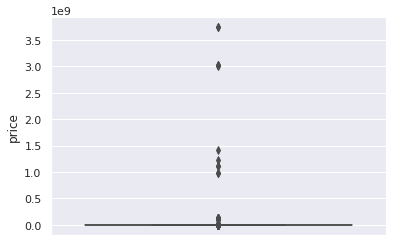

In [ ]:
sns.boxplot(y=df.price)

In [35]:
quantile1, quantile3 = np.percentile(df.price,[9,95])
print('Q1 =', quantile1, '\nQ3 =' , quantile3)

Q1 = 249.0 
Q3 = 44500.0


In [36]:
# condición a la que pertenecen los autos con menor precio
df[df.price<=quantile1]['condition'].unique()

array([nan, 'excellent', 'like new', 'good', 'new', 'fair', 'salvage'],
      dtype=object)

In [37]:
# año de frabricación de los autos con menor precio
df[df.price<=quantile1]['year'].unique()

array([  nan, 2011., 2004., 2018., 2019., 2015., 2014., 2017., 2016.,
       2020., 2021., 2012., 2008., 2006., 2010., 2007., 2002., 2003.,
       1992., 2009., 1988., 2013., 1999., 1903., 2005., 2001., 1994.,
       1995., 1997., 1955., 1956., 1932., 1974., 1954., 1977., 2000.,
       1971., 1973., 1975., 1986., 1965., 1996., 1990., 1952., 1993.,
       1967., 1998., 1989., 1972., 1940., 1980., 1970., 1960., 1949.,
       1957., 1978., 1961., 1900., 1939., 1941., 1936., 2022., 1928.,
       1962., 1966., 1953., 1985., 1991., 1981., 1931., 1984., 1982.,
       1963., 1987., 1950., 1964., 1926., 1969., 1976., 1983., 1947.,
       1951., 1959., 1979., 1927., 1948., 1901., 1942., 1938., 1946.,
       1935., 1968., 1958., 1923., 1929., 1937., 1930., 1925.])

In [38]:
# mínima cant de km registrados por el odómetro en los autos de menor precio
df[df.price<=quantile1]['odometer'].min()

0.0

In [39]:
df_inf_9 = (df.price<quantile1).sum() 
df_sup_95 = (df.price>quantile3).sum() 
print("%s : %.2f%%" % ('Porcentaje de autos con precio menor a Q1', (df_inf_9/df.shape[0])*100))
print("%s : %.2f%%" % ('Porcentaje de autos con precio mayor a Q3', (df_sup_95/df.shape[0])*100))

Porcentaje de autos con precio menor a Q1 : 9.00%
Porcentaje de autos con precio mayor a Q3 : 4.99%


In [40]:
# Eliminación de aquellos valores fuera del rango interquartil seleccionado (9-95)
df = df[(df.price < quantile3) & (df.price >= quantile1 )].copy()

##### Outliers en la columna odometer 

In [41]:
print('Cantidad de elementos nulos en odómetro :', df["odometer"].isna().sum())
print("%s : %.2f%%" % ('Porcentaje de elementos que tienen odómetro nulo', (df["odometer"].isna().sum()/df.shape[0])*100))
print('Menor cant. registrada :', df["odometer"].min() )

Cantidad de elementos nulos en odómetro : 2066
Porcentaje de elementos que tienen odómetro nulo : 0.56%
Menor cant. registrada : 0.0


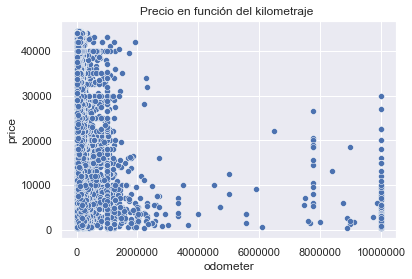

In [42]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.set_title('Precio en función del kilometraje ')
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)

In [43]:
print('Los autos con más km registrados poseen :', df["odometer"].max(), 'km')

Los autos con más km registrados poseen : 10000000.0 km


In [44]:
# Eliminar los autos con cant de km registrados por el odómetro menor a 100km considerandose límite inferior
# para autos usados
df.drop(df[df["odometer"]<=100.0].index,inplace=True)

# Podemos observar en el gráfico un corte a la altura de 3M km donde los valores empiezan a ser menos frecuentes,
# por lo tanto, decidimos eliminar los autos con cant de km mayor a 3 millones considerandose como valores extremos 
df.drop(df[df["odometer"]>=3000000.0].index,inplace=True)

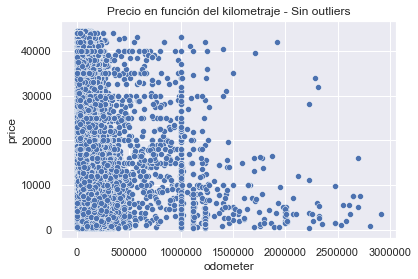

In [46]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.set_title('Precio en función del kilometraje - Sin outliers');

In [47]:
df = df.dropna(subset=['odometer'])

##### Outliers columna año

In [48]:
print('Cantidad de elementos nulos en año : ', df["year"].isna().sum())
print("%s : %.2f%%" % ('Porcentaje de elementos que tienen años nulos', (df["year"].isna().sum()/df.shape[0])*100))
print('Menor año registrado :', df["year"].min() )

Cantidad de elementos nulos en año :  627
Porcentaje de elementos que tienen años nulos : 0.17%
Menor año registrado : 1900.0


In [49]:
# Eliminar los elementos nulos de la columna año ya que representan un porcentaje muy bajo del total de datos
df = df.dropna(subset=['year'])

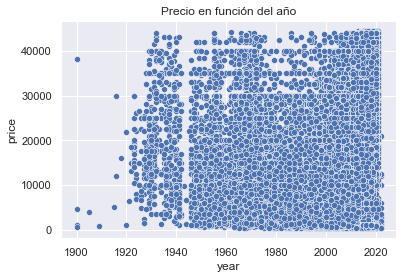

In [51]:
bx = sns.scatterplot(x="year", y="price", data=df)
bx.set_title('Precio en función del año');

In [52]:
# Podemos observar en el gráfico un corte aprox en el año 1920, autos más antiguos empiezan a ser menos frecuentes,
# por lo tanto, decidimos conservar únicamente aquellos con años superiores
df = df.drop(df[df.year<=1920].index) 

# Además, se decidió eliminar aquellos autos cuyo año sea mayor al actual
df = df.drop(df[df.year>2021].index)

### Valores Nulos

In [58]:
# Función para observar el porcentaje de nans que tiene cada columna
def nans_percentage(pf):
    null_values=pf.isnull().sum()
    null_values=pd.DataFrame(null_values,columns=['null'])
    j=1
    sum_tot=len(pf)
    null_values['percent']=null_values['null']/sum_tot
    return round(null_values*100,3).sort_values('percent',ascending=False)

In [59]:
nans_percentage(df)

null  percent
cylinders     14427700   40.092
condition     13155700   36.557
drive         11022100   30.628
paint_color   10401700   28.904
type           7675200   21.328
manufacturer   1268600    3.525
title_status    627100    1.743
fuel            198900    0.553
transmission    133600    0.371
price                0    0.000
year                 0    0.000
odometer             0    0.000
state                0    0.000

Reemplazo de nulos en la condición teniendo en cuenta el kilometraje registrado por el odómetro

In [60]:
df.condition.value_counts()

good         114758
excellent     87804
like new      18059
fair           6514
new             617
salvage         559
Name: condition, dtype: int64

In [61]:
excellent_odo_mean = df[df['condition'] == 'excellent']['odometer'].mean()
good_odo_mean = df[df['condition'] == 'good']['odometer'].mean()
like_new_odo_mean = df[df['condition'] == 'like new']['odometer'].mean()
salvage_odo_mean = df[df['condition'] == 'salvage']['odometer'].mean()
fair_odo_mean = df[df['condition'] == 'fair']['odometer'].mean()

In [63]:
print('"Like new" average odometer:', round( like_new_odo_mean,2))
print('"Excellent" average odometer:', round( excellent_odo_mean,2))
print('"Good" average odometer:', round( good_odo_mean,2))
print('"Fair" average odometer:', round( fair_odo_mean,2))
print('"Salvage" average odometer:', round( salvage_odo_mean,2))

"Like new" average odometer: 87211.72
"Excellent" average odometer: 110437.91
"Good" average odometer: 81499.45
"Fair" average odometer: 178660.88
"Salvage" average odometer: 172845.46


In [64]:
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

In [65]:
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')

df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

Elimina los nulos de aquellas columnas que tienen menos de 5% del total

In [66]:
df = df.dropna(subset=['title_status','fuel','transmission','manufacturer'])

Imputar aleatoriamente valores existentes del dataset, en su misma proporción, para rellenar nulos en las columnas restantes

In [67]:
# función para rellenar aleatoriamente los nulos con valores del dataset 
def imputar_sampleo(x):
    import random
    df.loc[df[df[x].isnull()][x].index,x] = np.random.choice(df[df[x].notnull()][x])
    return df

In [68]:
df = imputar_sampleo('cylinders')
df = imputar_sampleo('paint_color')
df = imputar_sampleo('type')
df = imputar_sampleo('drive')

In [69]:
nans_percentage(df)

null  percent
price            0    0.000
year             0    0.000
manufacturer     0    0.000
condition        0    0.000
cylinders        0    0.000
fuel             0    0.000
odometer         0    0.000
title_status     0    0.000
transmission     0    0.000
drive            0    0.000
type             0    0.000
paint_color      0    0.000
state            0    0.000

## 3.Visualizaciones y Gráficos

In [70]:
from scipy import stats

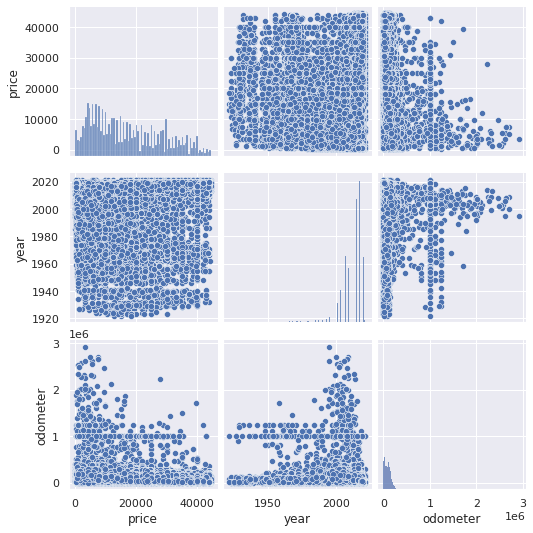

In [ ]:
sns.pairplot(df)

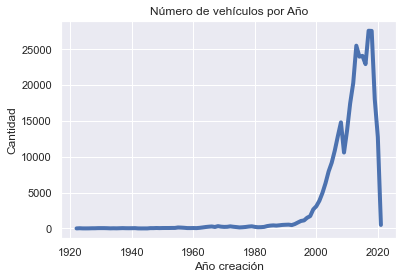

In [71]:
# Cantidad de vehiculos por año
df[df.year >= 1900].year.value_counts().sort_index().plot(lw = 4)
plt.title("Número de vehículos por Año")
plt.xlabel("Año creación")
plt.ylabel("Cantidad")
plt.show()

 La mayoría de los vehículos del dataset, son del modelo 2000 al 2020.

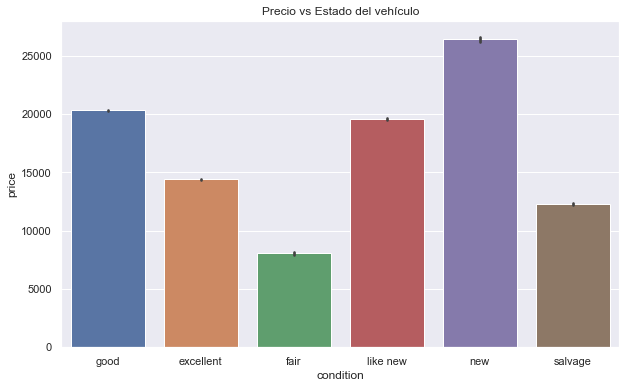

In [72]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="condition", y="price", data=df)
ax.set_title('Precio vs Estado del vehículo');

Se puede obaservar una correlación lógica donde los vehículos nuevos son más caros y los que se encuentran en peores condiciones son los de menor precio

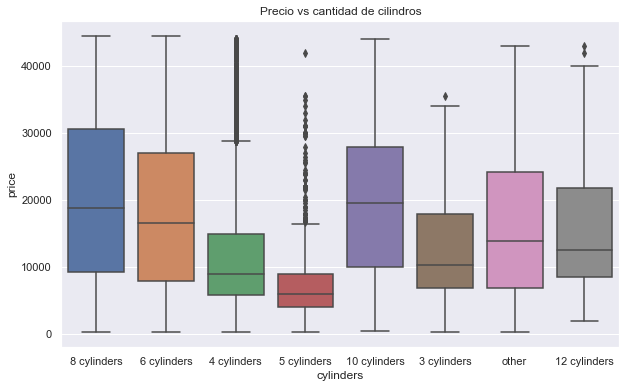

In [73]:
plt.figure(figsize=(10,6))
bx = sns.boxplot(y="price", x='cylinders', data=df)
bx.set_title('Precio vs cantidad de cilindros');

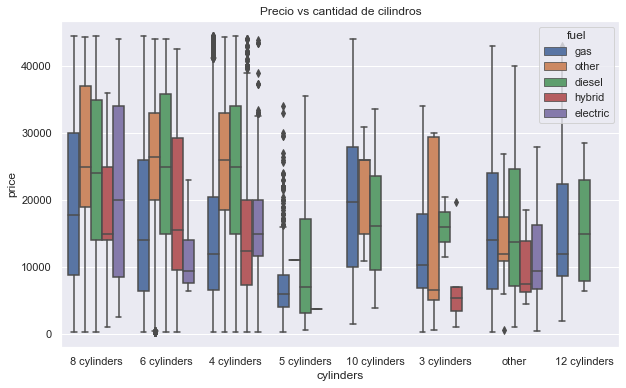

In [ ]:
plt.figure(figsize=(10,6))
bx = sns.boxplot(y="price", x='cylinders',hue='fuel', data=df)
bx.set_title('Precio vs cantidad de cilindros');

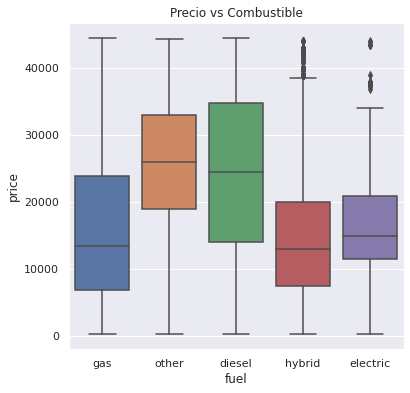

In [ ]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x="fuel", y="price", data=df)
ax.set_title('Precio vs Combustible');

Podemos observar que los autos con menor precio son aquellos que poseen 5 cilindros, seguidos por los de 3. Dentro de los de 5 predomina el combustible diesel y gas, lo mismo puede observarse en los autos con 12 cilindros. 

El resto de los precios se encuentra distribuído en el rango de 15 - 30 mil. La mayoría de los autos a gas presentas menores precios que el resto.

In [74]:
df[df['cylinders']=='5 cylinders']['price'].describe()

count    1469.000
mean     7452.246
std      5330.680
min       321.000
25%      3999.000
50%      6000.000
75%      8995.000
max     42000.000
Name: price, dtype: float64

In [75]:
# Eliminar de autos con 5 cilindros, precio mayor a Q75 y con mala condición 
df.drop(df[(df['cylinders']=='5 cylinders') & (df['price']>=8995.000) & 
       ((df['condition']=='salvage') | (df['condition']=='fair'))].index, inplace=True)

df.drop(df[(df['cylinders']=='5 cylinders') & (df['price']>=40000)].index, inplace=True)

In [76]:
df[df['cylinders']=='3 cylinders']['price'].describe()

count     429.000
mean    12718.531
std      8187.647
min       250.000
25%      6900.000
50%     10295.000
75%     17995.000
max     35500.000
Name: price, dtype: float64

In [77]:
def umbral_outlier(dataset_out,tipo=1):
    quantile1, quantile3 = np.percentile(dataset_out,[25,75])
    if tipo==1:
        umbral = (quantile3-quantile1)*1.5 + quantile3
    else:
        umbral =  quantile1 - (quantile3-quantile1)*1.5 
    print(umbral)
    return umbral

In [78]:
# Eliminar aquellos autos con 3 cilindros y precio mayor al umbral
col_price_3cyl = df[df['cylinders']=='3 cylinders']['price']
umbral_3cyl = umbral_outlier(col_price_3cyl,1)
df.drop(df[(df['cylinders']=='3 cylinders') & (df['price']>=umbral_3cyl)].index, inplace=True)

34637.5


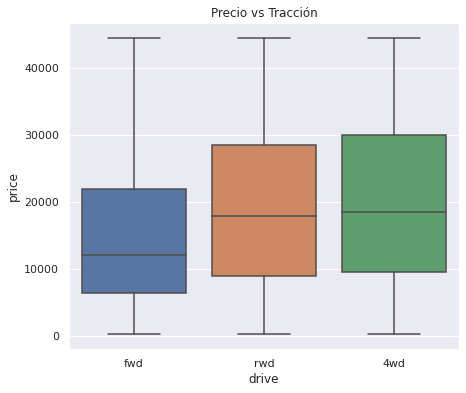

In [ ]:
plt.figure(figsize=(7,6))
bx = sns.boxplot(y="price", x='drive', data=df)
bx.set_title('Precio vs Tracción');

En relación al tipo de tracción, el precio presenta variaciones. Se determina un valor inferior para los autos con tracción delantera. En relación a tracción trasera y 4x4 no se observa una diferencia extrema, aun así puede mencionarse que la media de rwd es mayor.

In [79]:
# Eliminar aquellos autos con tracción delantera y precio mayor al umbral
col_price_fwd = df[df['drive']=='fwd']['price']
umbral_fwd = umbral_outlier(col_price_fwd,1)
df.drop(df[(df['drive']=='fwd') & (df['price']>=umbral_fwd)].index,inplace=True)

34982.5


Análisis de frabricantes

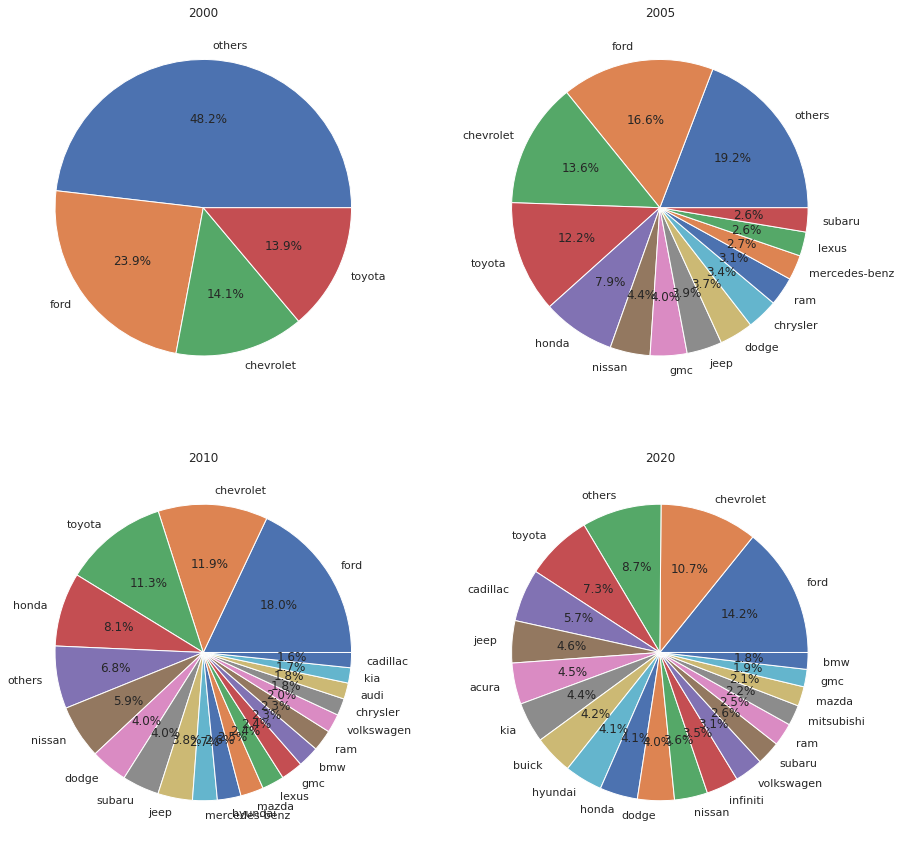

In [ ]:
df_year = df[(df["year"]>1999) & (df["year"]<2021)].copy()
df_year["year"] = df_year["year"].astype(int)
df_year["tmp"] = 1
data = pd.pivot_table(df_year, index = "manufacturer", columns="year",values="tmp",aggfunc=np.sum)
data = data.fillna(0)
data.loc['others'] = data[data<200].sum()
data[data<200] = 0

plt.figure(figsize=(15,15))
tmp_data1 = data[2000].sort_values(ascending=False)
plt.subplot(221)
tmp_data1[tmp_data1>0].plot.pie(autopct="%.1f%%",title="2000")
plt.axis("off")

tmp_data2 = data[2005].sort_values(ascending=False)
plt.subplot(222)
tmp_data2[tmp_data2>0].plot.pie(autopct="%.1f%%",title="2005")
plt.axis("off")

tmp_data3 = data[2010].sort_values(ascending=False)
plt.subplot(223)
tmp_data3[tmp_data3>0].plot.pie(autopct="%.1f%%",title="2010")
plt.axis("off")

tmp_data4 = data[2020].sort_values(ascending=False)
plt.subplot(224)
tmp_data4[tmp_data4>0].plot.pie(autopct="%.1f%%",title="2020")
plt.axis("off")
plt.show() 

Desde el año 2000 al año 2020, Ford es el fabricante que actualmente más vehiculos tiene en la base de datos de Craigslist

In [80]:
print('Porcentaje de autos que posee cada fabricante:\n',df.manufacturer.value_counts(normalize=True)*100)

Porcentaje de autos que posee cada fabricante:
 ford              16.711
chevrolet         13.172
toyota             8.615
honda              5.574
nissan             4.788
jeep               4.656
ram                3.840
gmc                3.771
bmw                3.725
dodge              3.251
mercedes-benz      2.661
hyundai            2.606
subaru             2.538
volkswagen         2.460
lexus              2.105
kia                2.102
audi               1.918
cadillac           1.707
chrysler           1.563
acura              1.539
mazda              1.415
buick              1.404
infiniti           1.251
lincoln            1.037
volvo              0.907
mitsubishi         0.839
pontiac            0.628
mini               0.620
jaguar             0.505
rover              0.454
mercury            0.323
saturn             0.308
porsche            0.290
alfa-romeo         0.250
fiat               0.219
tesla              0.189
harley-davidson    0.034
datsun             0.017
la

In [81]:
print('Fabricantes que representan menos del 0.5% del total:\n', df.manufacturer.value_counts(normalize=True)[29:]*100)

Fabricantes que representan menos del 0.5% del total:
 rover             0.454
mercury           0.323
saturn            0.308
porsche           0.290
alfa-romeo        0.250
fiat              0.219
tesla             0.189
harley-davidson   0.034
datsun            0.017
land rover        0.003
aston-martin      0.003
ferrari           0.003
morgan            0.001
Name: manufacturer, dtype: float64


In [82]:
# Eliminar fabricantes que representen menos del 0,5% de los datos para que sus escasos datos no influyan en la predicción generando sesgo
df.drop(df[~df['manufacturer'].isin(df.manufacturer.value_counts(normalize=True)[:29].to_dict().keys())].index,inplace=True)

Text(0.5, 1.0, 'Cantidad de autos de cada fabricante')

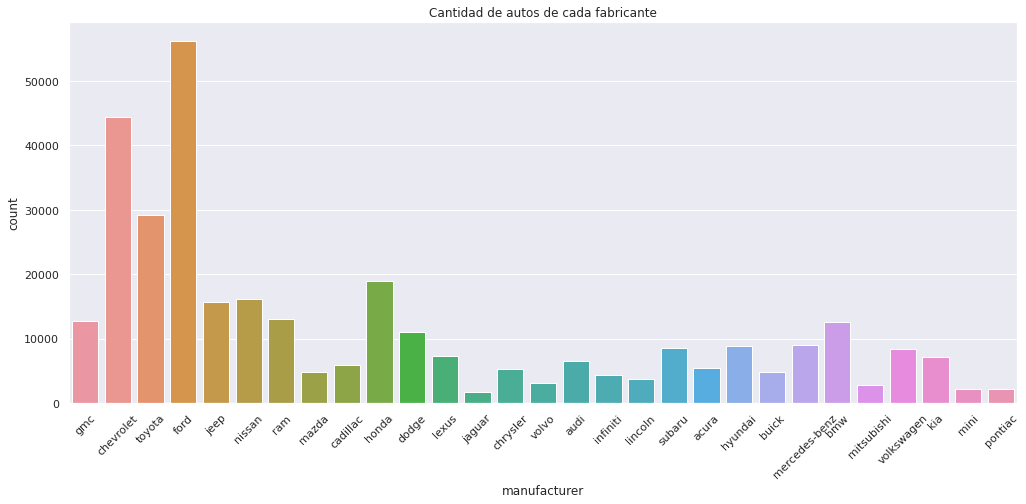

In [194]:
plt.figure(figsize=(17,7))
ax = sns.countplot(x='manufacturer', data=df)
plt.xticks(rotation=45)
ax.set_title('Cantidad de autos de cada fabricante')

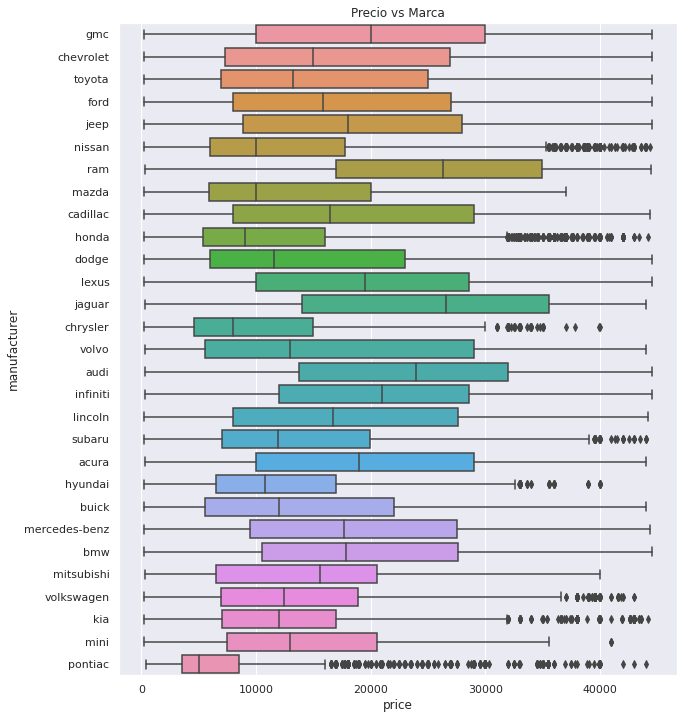

In [ ]:
plt.figure(figsize=(10,12))
ax = sns.boxplot(y="manufacturer", x="price", data=df)
ax.set_title('Precio vs Marca');

El fabricante Ford es el que mayor cantidad de vehículos posee, seguido por Chevrolet y Toyota. Por el contrario, los que menor tienen son Jaguar, Pontiac y Mini.

Aquellos que presentan un mayor precio promedio son Jaguar y RAM, seguidos por Audi. Los de menor promedio son Pontiac y Chrysler.



In [83]:
df[df['manufacturer']=='ford']['drive'].value_counts()

4wd    35850
rwd    10579
fwd     9832
Name: drive, dtype: int64

In [84]:
df[df['manufacturer']=='ford']['price'].describe()

count   56261.000
mean    17852.557
std     11610.693
min       249.000
25%      7990.000
50%     15850.000
75%     26999.000
max     44499.000
Name: price, dtype: float64

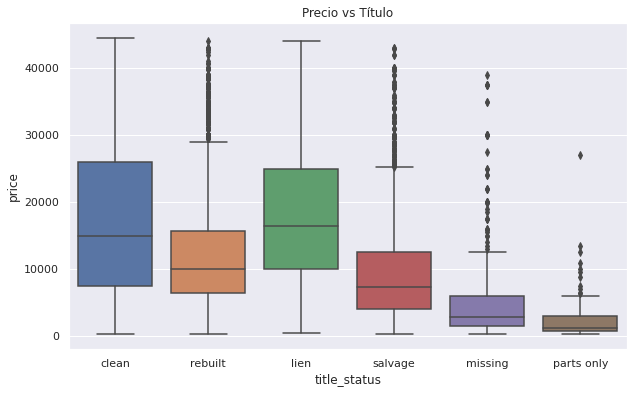

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(x="title_status", y="price", data=df)
ax.set_title('Precio vs Título');

Los vehículos que poseen los papeles en orden tienen un mayor precio que aquellos en los que no se encuentran en buenas condiciones, siendo los de menor costo los que solo cuentan con partes del título. 

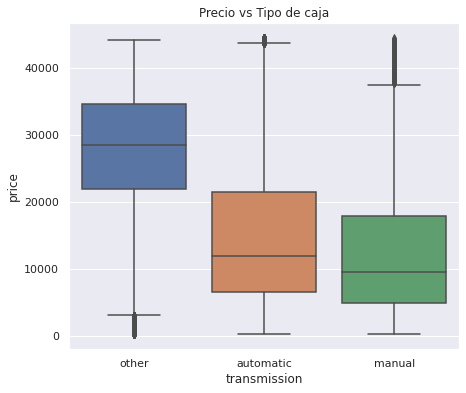

In [ ]:
plt.figure(figsize=(7,6))
ax = sns.boxplot(x="transmission", y="price", data=df)
ax.set_title('Precio vs Tipo de caja');

Se observa una diferencia mínima, donde los vehículos de caja automática poseen mayor precio que los de caja manual. Por otra parte, aquellos clasificados dentro de la categoría 'other' poseen un precio significativamente mayor a los dos anteriores.

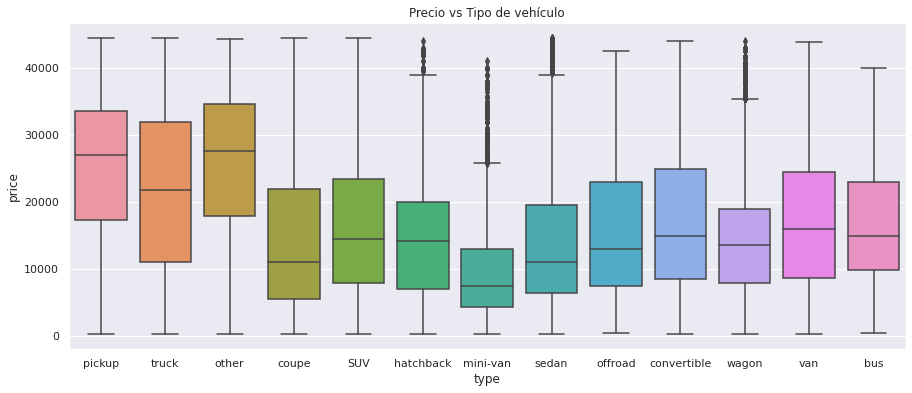

In [ ]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x="type", y="price", data=df)
ax.set_title('Precio vs Tipo de vehículo');

Cada tipo de vehículo posee un alto rango de valores correspondientes. Aun así, es notable la diferencia de valores entre tipos, encontrándose en los extremos 'pickup' con el mayor precio medio, y 'mini-van' con el menor.

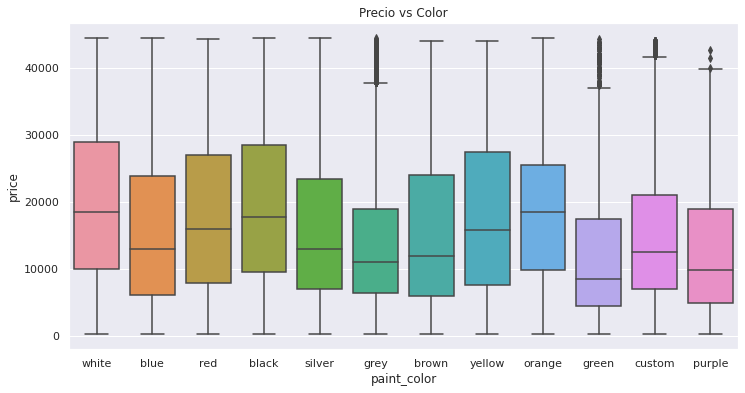

In [ ]:
plt.figure(figsize=(12,6))
ax = sns.boxplot(x="paint_color", y="price", data=df)
ax.set_title('Precio vs Color');

Los colores de pintura no tienen gran incidencia en el costo del vehículo. La mayoría permanece dentro del rango 8 - 30mil, con leves diferencias entre ellos. 

El que presenta una diferencia más notable es el color verde, con menor precio que los demás.

In [85]:
# Eliminar colores de pintura que representen menos de 0,5% del total
df.paint_color.value_counts(normalize=True)[9:]

orange   0.005
yellow   0.005
purple   0.002
Name: paint_color, dtype: float64

In [86]:
df.drop(df[df['paint_color'].isin(df.paint_color.value_counts(normalize=True)[9:].to_dict().keys())].index,inplace=True)

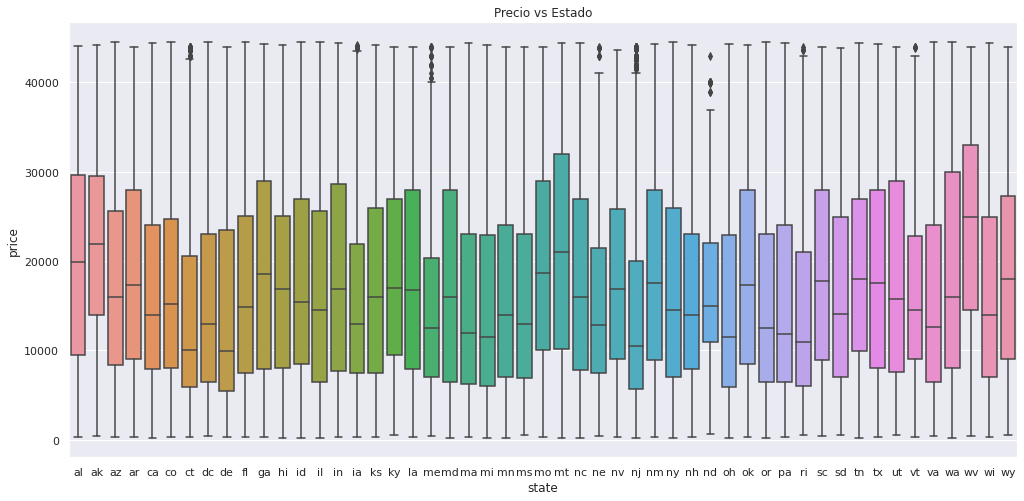

In [ ]:
plt.figure(figsize=(17,8))
ax = sns.boxplot(x="state", y="price", data=df)
ax.set_title('Precio vs Estado');

Se puede observar que el precio de los vehículos incorpora un amplio rango de valores para cada estado. 

Puede destacarse Virginia Occidental (wv) como el de mayor precio medio. Si bien los demás presentas variaciones incorporan sus valores dentro de un rango similar.

#  Procesamiento de los datos 


In [87]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

Los valores elegidos para cada mapper fueron seleccionados en base al precio, dándole un valor mayor al que más precio tenía.

In [88]:
mapper_condition={'new':6, 'good':5, 'like new':4, 'excellent':3, 'salvage':2, 'fair':1}
mapper_cylinder={'8 cylinders': 8, '10 cylinders':7, '6 cylinders':6, 'other':5, '4 cylinders':4, '12 cylinders':3, '3 cylinders':2, '5 cylinders':1}
mapper_drive={'4wd':3, 'rwd':2,'fwd':1}
mapper_title={'clean':6, 'lien':5, 'rebuilt':4, 'salvage':3, 'missing':2, 'parts only':1}
mapper_fuel={'other':5, 'diesel':4, 'electric':3, 'gas':2, 'hybrid':1}
mapper_transmission={'other':3, 'automatic':2, 'manual':1}
mapper_type={'other':13, 'pickup':12, 'truck':11, 'coupe':10, 'convertible':9, 'van':8, 'bus':7, 'hatchback':6, 'wagon':5, 'offroad':4, 'SUV':3, 'sedan':2, 'mini-van':1}

In [89]:
class mapper_transformer (BaseEstimator, TransformerMixin):
    def __init__(self,mapper):
        self.mapper=mapper

    def fit(self, x, y=None):
        return self

    def transform(self, x, y=None):
        col_mapped = x.replace(self.mapper)
        return col_mapped

In [90]:
preprocesador = make_column_transformer ( 
    (OrdinalEncoder(),['manufacturer','paint_color','state']),
    (mapper_transformer(mapper_condition),['condition']),
    (mapper_transformer(mapper_cylinder),['cylinders']),
    (mapper_transformer(mapper_drive),['drive']), 
    (mapper_transformer(mapper_title),['title_status']), 
    (mapper_transformer(mapper_fuel),['fuel']),
    (mapper_transformer(mapper_transmission),['transmission']),
    (mapper_transformer(mapper_type),['type']),
       
    remainder='passthrough'
)

#### Sin escalar los datos

In [91]:
df_transform = pd.DataFrame(preprocesador.fit_transform(df),
                            columns=['manufacturer','paint_color','state', 'condition', 'cylinders',
                             'drive','title_status','fuel','transmission', 'type', 'price', 'year','odometer'])

#### Escalar los datos
Esta sección del notebook va a runnearse cuando se quiera escalar los datos

In [92]:
minmax = MinMaxScaler()
df_transform[['odometer','year']] = pd.DataFrame(minmax.fit_transform(df_transform[['odometer','year']]), columns=['odometer','year'])

In [93]:
minmax2 = MinMaxScaler()
df_transform[['price']] = pd.DataFrame(minmax2.fit_transform(df_transform[['price']]), columns=['price'])

Se procedió a ejecutar el algoritmo sin escalado de datos y luego efectuando el escalamiento, arrojando valores altísimos en la función de costos para el primer caso, es decir, sin el escalado. 

### Split Train and Test data


In [94]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [95]:
y = df_transform.price
X = df_transform.drop('price',axis=1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val , y_train , y_val = train_test_split(X_train , y_train , test_size = 0.20, random_state=42)

In [97]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)
print (X_val.shape, y_val.shape)

(208630, 12) (208630,)
(65198, 12) (65198,)
(52158, 12) (52158,)


# Modelos predictivos

## Aprendizaje Supervisado - Random Forest

In [98]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor

In [99]:
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [100]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4))
print('Model Score:',round(regressor.score(X_test,y_test)*100,4),'%')

Mean Absolute Error: 0.0495
Mean Squared Error: 0.0085
Root Mean Squared Error: 0.0923
Model Score: 86.8022 %


## Modelos con Redes Neuronales

In [101]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.losses import mean_squared_error
from sklearn.metrics import r2_score
from keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model

In [102]:
def plot_results():
    epochs = range(1,len(history.history['loss'])+1,1) # obtener número de epochs del eje X
    plt.title('Loss / Mean Squared Error')
    plt.plot(epochs, history.history['loss'], label='train')
    plt.plot(epochs, history.history['val_loss'], label='validation')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend()
    plt.show()

### Modelo 1 
Única Capa, 24 Neuronas 


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                312       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________

Entrenamiento: 

Epoch 1/10
6520/6520 - 6s - loss: 0.0757 - val_loss: 0.0544
Epoch 2/10
6520/6520 - 5s - loss: 0.0406 - val_loss: 0.0322
Epoch 3/10
6520/6520 - 4s - loss: 0.0371 - val_loss: 0.0631
Epoch 4/10
6520/6520 - 5s - loss: 0.0351 - val_loss: 0.0290
Epoch 5/10
6520/6520 - 5s - loss: 0.0337 - val_loss: 0.0276
Epoch 6/10
6520/6520 - 5s - loss: 0.0323 - val_loss: 0.0456
Epoch 7/10
6520/6520 - 5s - loss: 0.0310 - val_loss: 0.0345
Epoch 8/10
6520/6520 - 5s - loss: 0.0298 - val_loss: 0.0325
Epoch 9/10
6520/6520 -

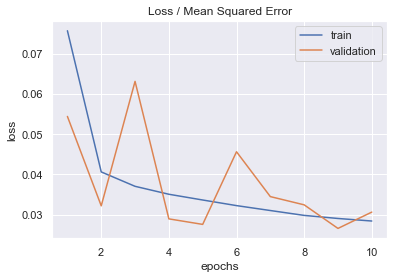

NameError: name 'visualizer' is not defined

In [103]:
model1 = Sequential()
model1.add(Dense(24, input_dim=12, activation="relu"))
model1.add(Dense(1, activation="relu"))

model1.summary()

model1.compile(optimizer="rmsprop", loss='mse')

epochs=10

print('\nEntrenamiento: \n')
history = model1.fit(X_train, y_train, 
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

print('\n---------------------------------------------------')

print('\nTesteo: \n')
test_loss = model1.evaluate(X_test, y_test)
print('\nTest loss:', "%.4f" %test_loss)

print('\n---------------------------------------------------')

compare_models = {}
compare_models["Modelo 1"] = {
        "Costo": round(test_loss,5),
        "Optimizador": "RMSprop",
        "Capas": "2 - 24/1",
        "F. Activación": "r/r",
        "Epochs": 10,
        "Early Stopping": "No"}

print('\nGráfica del costo: \n')
plot_results()
visualizer(model1, format='png',  filename='red_neuronal_1')

### Modelo 2 
Incorporación de más neuronas en la capa

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 48)                624       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 49        
Total params: 673
Trainable params: 673
Non-trainable params: 0
_________________________________________________________________

Entrenamiento: 

Epoch 1/10
6554/6554 - 18s - loss: 0.1230 - val_loss: 0.0553
Epoch 2/10
6554/6554 - 17s - loss: 0.0387 - val_loss: 0.0543
Epoch 3/10
6554/6554 - 18s - loss: 0.0337 - val_loss: 0.0356
Epoch 4/10
6554/6554 - 18s - loss: 0.0311 - val_loss: 0.0281
Epoch 5/10
6554/6554 - 18s - loss: 0.0292 - val_loss: 0.0264
Epoch 6/10
6554/6554 - 18s - loss: 0.0278 - val_loss: 0.0357
Epoch 7/10
6554/6554 - 18s - loss: 0.0267 - val_loss: 0.0271
Epoch 8/10
6554/6554 - 18s - loss: 0.0260 - val_loss: 0.0257
Epoch 9/10
6

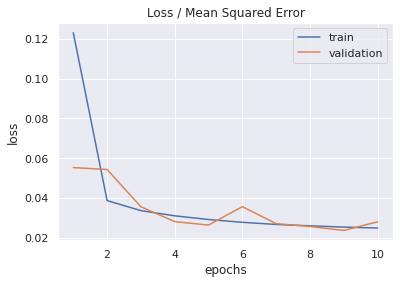

In [ ]:
model2 = Sequential()
model2.add(Dense(48, input_dim=12, activation="relu"))
model2.add(Dense(1, activation="relu"))

model2.summary()

model2.compile(optimizer="rmsprop", loss='mse')

epochs=10

print('\nEntrenamiento: \n')
history = model2.fit(X_train, y_train, 
                    epochs=10,
                    validation_data=(X_val, y_val),
                    verbose=2)

print('\n---------------------------------------------------')

print('\nTesteo: \n')
test_loss = model2.evaluate(X_test, y_test)
print('\nTest loss:', "%.4f" %test_loss)

print('\n---------------------------------------------------')

compare_models["Modelo 2"] = {
        "Costo": round(test_loss,4),
        "Optimizador": "RMSprop",
        "Capas": "2 - 48/1",
        "F. Activación": "r/r",
        "Epochs": 10,
        "Early Stopping": "No"}

print('\nGráfica del costo: \n')
plot_results()
visualizer(model2, format='png',  filename='red_neuronal_2')

### Modelo 3
Incorporación de una capa más

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_11 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 25        
Total params: 1,825
Trainable params: 1,825
Non-trainable params: 0
_________________________________________________________________

Entrenamiento: 

Epoch 1/10
6554/6554 - 20s - loss: 0.0643 - val_loss: 0.0404
Epoch 2/10
6554/6554 - 19s - loss: 0.0330 - val_loss: 0.0284
Epoch 3/10
6554/6554 - 19s - loss: 0.0292 - val_loss: 0.0293
Epoch 4/10
6554/6554 - 19s - loss: 0.0273 - val_loss: 0.0258
Epoch 5/10
6554/6554 - 19s - loss: 0.0262 - val_loss: 0.0245
Epoch 6/10
6554/6554 - 19s - loss: 0.0253 - val_loss: 0.025

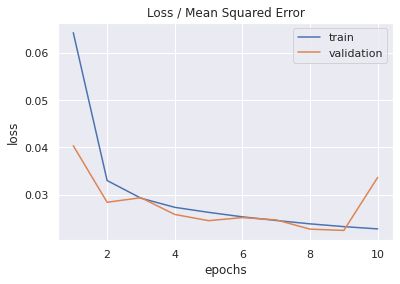

In [ ]:
model3 = Sequential()
model3.add(Dense(48, input_dim=12, activation="relu"))
model3.add(Dense(24, activation="relu"))
model3.add(Dense(1, activation="relu"))

model3.summary()

model3.compile(optimizer="rmsprop", loss='mse')

epochs=10

print('\nEntrenamiento: \n')
history = model3.fit(X_train, y_train, 
                    epochs=10,
                    validation_data=(X_val, y_val),
                    verbose=2)
print('\n---------------------------------------------------')

print('\nTesteo: \n')
test_loss = model3.evaluate(X_test, y_test)
print('\nTest loss:', "%.4f" %test_loss)
print('\n---------------------------------------------------')

compare_models["Modelo 3"] = {
        "Costo": round(test_loss,4),
        "Optimizador": "RMSprop",
        "Capas": "3 - 48/24/1",
        "F. Activación": "r/r/r",
        "Epochs": 10,
        "Early Stopping": "No"}

print('\nGráfica del costo: \n')
plot_results()

### Modelo 4 
Misma cantidad de capas, distinta función de activación

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_14 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 25        
Total params: 1,825
Trainable params: 1,825
Non-trainable params: 0
_________________________________________________________________

Entrenamiento: 

Epoch 1/10
6554/6554 - 20s - loss: 0.0450 - val_loss: 0.0385
Epoch 2/10
6554/6554 - 19s - loss: 0.0342 - val_loss: 0.0331
Epoch 3/10
6554/6554 - 19s - loss: 0.0306 - val_loss: 0.0278
Epoch 4/10
6554/6554 - 19s - loss: 0.0289 - val_loss: 0.0269
Epoch 5/10
6554/6554 - 19s - loss: 0.0277 - val_loss: 0.0242
Epoch 6/10
6554/6554 - 19s - loss: 0.0267 - val_loss: 0.045

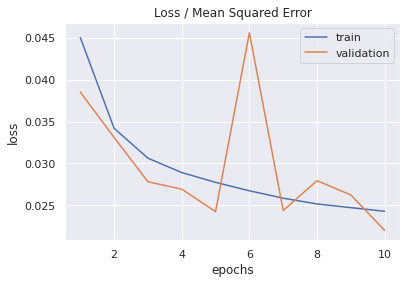

In [ ]:
model4 = Sequential()
model4.add(Dense(48, input_dim=12, activation="relu"))
model4.add(Dense(24, activation="tanh"))
model4.add(Dense(1, activation="relu"))

model4.summary()

model4.compile(optimizer="rmsprop", loss='mse')

epochs=10

print('\nEntrenamiento: \n')
history = model4.fit(X_train, y_train, 
                    epochs=10,
                    validation_data=(X_val, y_val),
                    verbose=2)
print('---------------------------------------------------')

print('\nTesteo: \n')
test_loss = model4.evaluate(X_test, y_test)
print('\nTest loss:', "%.4f" %test_loss)
print('---------------------------------------------------')

compare_models["Modelo 4"] = {
        "Costo": round(test_loss,4),
        "Optimizador": "RMSprop",
        "Capas": "3 - 48/24/1",
        "F. Activación": "r/t/r",
        "Epochs": 10,
        "Early Stopping": "No"}

print('\nGráfica del costo: \n')
plot_results()
visualizer(model4, format='png',  filename='red_neuronal_4')

### Modelo 5 
Incorporación de una capa más 

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_96 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_97 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_98 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_99 (Dense)             (None, 1)                 25        
Total params: 2,425
Trainable params: 2,425
Non-trainable params: 0
_________________________________________________________________

Entrenamiento: 

Epoch 1/10
6554/6554 - 22s - loss: 0.1012 - val_loss: 0.0327
Epoch 2/10
6554/6554 - 20s - loss: 0.0321 - val_loss: 0.0262
Epoch 3/10
6554/6554 - 20s - loss: 0.0280 - val_loss: 0.0427
Epoch 4/10
6554/6554 - 21s - loss: 0.0262 - val_

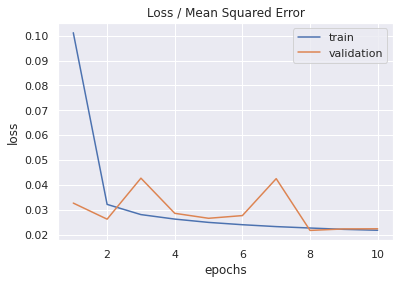

In [ ]:
model5 = Sequential()
model5.add(Dense(48, input_dim=12, activation="relu"))
model5.add(Dense(24, activation="relu"))
model5.add(Dense(24, activation="relu"))
model5.add(Dense(1, activation="relu"))

model5.summary()

model5.compile(optimizer="rmsprop", loss='mse')

epochs=10

print('\nEntrenamiento: \n')
history = model5.fit(X_train, y_train, 
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

print('\n---------------------------------------------------')

print('\nTesteo: \n')
test_loss = model5.evaluate(X_test, y_test)
print('\nTest loss:', "%.4f" %test_loss)

print('\n---------------------------------------------------')

compare_models["Modelo 5"] = {
        "Costo": round(test_loss,4),
        "Optimizador": "RMSprop",
        "Capas": "4 - 48/24/24/1",
        "F. Activación": "r/r/r/r",
        "Epochs": 10,
        "Early Stopping": "No"}

print('\nGráfica del costo: \n')
plot_results()
visualizer(model5, format='png',  filename='red_neuronal_5')

### Modelo 6
Mismas capas, distinta función de activación  

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_21 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_22 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 25        
Total params: 2,425
Trainable params: 2,425
Non-trainable params: 0
_________________________________________________________________

Entrenamiento: 

Epoch 1/10
6554/6554 - 22s - loss: 0.0452 - val_loss: 0.0337
Epoch 2/10
6554/6554 - 21s - loss: 0.0327 - val_loss: 0.0262
Epoch 3/10
6554/6554 - 21s - loss: 0.0287 - val_loss: 0.0284
Epoch 4/10
6554/6554 - 21s - loss: 0.0266 - val_l

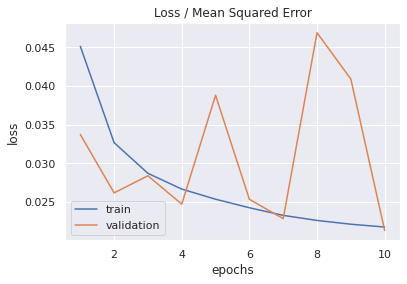

In [ ]:
model6 = Sequential()
model6.add(Dense(48, input_dim=12, activation="relu"))
model6.add(Dense(24, activation="tanh"))
model6.add(Dense(24, activation="tanh"))
model6.add(Dense(1, activation="relu"))

model6.summary()

model6.compile(optimizer="rmsprop", loss='mse')

epochs=10

print('\nEntrenamiento: \n')
history = model6.fit(X_train, y_train, 
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

print('\n---------------------------------------------------')

print('\nTesteo: \n')
test_loss = model6.evaluate(X_test, y_test)
print('\nTest loss:', "%.4f" %test_loss)

print('\n---------------------------------------------------')
compare_models["Modelo 6"] = {
        "Costo": round(test_loss,4),
        "Optimizador": "RMSprop",
        "Capas": "4 - 48/24/24/1",
        "F. Activación": "r/t/t/r",
        "Epochs": 10,
        "Early Stopping": "No"}

print('\nGráfica del costo: \n')
plot_results()
visualizer(model6, format='png',  filename='red_neuronal_6')

### Modelo 7 
Mismas capas distinta función de activación

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 48)                624       
_________________________________________________________________
dense_109 (Dense)            (None, 24)                1176      
_________________________________________________________________
dense_110 (Dense)            (None, 24)                600       
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 25        
Total params: 2,425
Trainable params: 2,425
Non-trainable params: 0
_________________________________________________________________

Entrenamiento: 

Epoch 1/10
6554/6554 - 21s - loss: 0.0455 - val_loss: 0.0455
Epoch 2/10
6554/6554 - 21s - loss: 0.0333 - val_loss: 0.0262
Epoch 3/10
6554/6554 - 21s - loss: 0.0293 - val_loss: 0.0288
Epoch 4/10
6554/6554 - 20s - loss: 0.0272 - val_

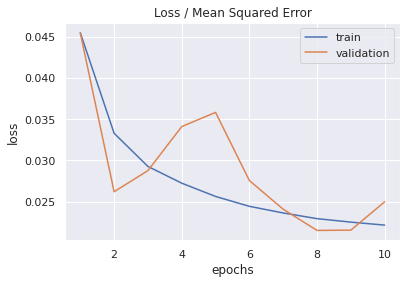

In [ ]:
model7 = Sequential()
model7.add(Dense(48, input_dim=12, activation="relu"))
model7.add(Dense(24, activation="relu"))
model7.add(Dense(24, activation="tanh"))
model7.add(Dense(1, activation="relu"))

model7.summary()

model7.compile(optimizer="rmsprop", loss='mse')

epochs=10

print('\nEntrenamiento: \n')
history = model7.fit(X_train, y_train, 
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)
print('---------------------------------------------------')

print('\nTesteo: \n')
test_loss = model7.evaluate(X_test, y_test)
print('\nTest loss:', "%.4f" %test_loss)
print('---------------------------------------------------')

compare_models["Modelo 7"] = {
        "Costo": round(test_loss,4),
        "Optimizador": "RMSprop",
        "Capas": "4 - 48/24/24/1",
        "F. Activación": "r/r/t/r",
        "Epochs": 10,
        "Early Stopping": "No"}

print('\nGráfica del costo: \n')
plot_results()

### Modelo 8 
Incorporación de más neuronas a las capas existentes

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 128)               1664      
_________________________________________________________________
dense_49 (Dense)             (None, 24)                3096      
_________________________________________________________________
dense_50 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_51 (Dense)             (None, 1)                 25        
Total params: 5,385
Trainable params: 5,385
Non-trainable params: 0
_________________________________________________________________

Entrenamiento: 

Epoch 1/10
6554/6554 - 21s - loss: 0.0420 - val_loss: 0.0333
Epoch 2/10
6554/6554 - 20s - loss: 0.0311 - val_loss: 0.0281
Epoch 3/10
6554/6554 - 20s - loss: 0.0281 - val_loss: 0.0369
Epoch 4/10
6554/6554 - 21s - loss: 0.0268 - val_

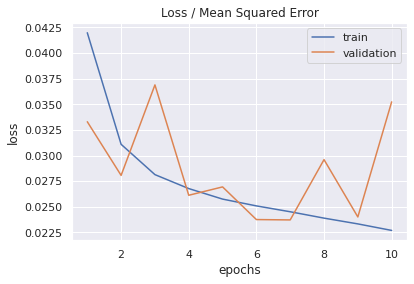

In [ ]:
model8 = Sequential()
model8.add(Dense(128, input_dim=12, activation="relu"))
model8.add(Dense(24, activation="relu"))
model8.add(Dense(24, activation="relu"))
model8.add(Dense(1, activation="relu"))

model8.summary()

model8.compile(optimizer="rmsprop", loss='mse')

epochs=10

print('\nEntrenamiento: \n')
history = model8.fit(X_train, y_train, 
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)
print('---------------------------------------------------')

print('\nTesteo: \n')
test_loss = model8.evaluate(X_test, y_test)
print('\nTest loss:', "%.4f" %test_loss)
print('---------------------------------------------------')

compare_models["Modelo 8"] = {
        "Costo": round(test_loss,4),
        "Optimizador": "RMSprop",
        "Capas": "4 - 128/24/24/1",
        "F. Activación": "r/r/r/r",
        "Epochs": 10,
        "Early Stopping": "No"}

print('\nGráfica del costo: \n')
plot_results()

### Modelo 9 
Optimizador Adam 

Al probar con tanh en algunas capas, en los modelo 6 y 7, vemos que a veces se obtienen mejores resultados, pero que la función de costo para el set de validación no es estable a medida que disminuye, por lo tanto, dependiendo el n° de épocas seleccionadas puede encontrarse un desempeño mejor o peor para el mismo modelo, con los mismos parámetros. 

Por otro lado, en el modelo 8, al incorporar mayor cantidad de neuronas, con el resto de los parámetros iguales, vemos cómo en la época 10 el costo de validación se aleja del de train, mostrando una tendencia hacia el overfitting.

Para probar con diferentes épocas y optimizadores se eligió el modelo 5, de 2 capas ocultas con la función de activación Relu en todas sus capas, dado que tiene una buena performance sin incrementar considerablemente la complejidad de la red al agregarle más capas y neuronas. 



Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_57 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_58 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_59 (Dense)             (None, 1)                 25        
Total params: 2,425
Trainable params: 2,425
Non-trainable params: 0
_________________________________________________________________

Entrenamiento: 

Epoch 1/10
6554/6554 - 18s - loss: 0.0402 - val_loss: 0.0390
Epoch 2/10
6554/6554 - 18s - loss: 0.0286 - val_loss: 0.0269
Epoch 3/10
6554/6554 - 18s - loss: 0.0268 - val_loss: 0.0249
Epoch 4/10
6554/6554 - 18s - loss: 0.0254 - val_

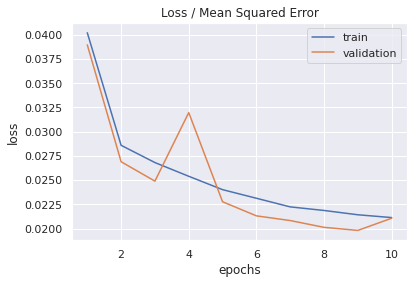

In [ ]:
model9 = Sequential()
model9.add(Dense(48, input_dim=12, activation="relu"))
model9.add(Dense(24, activation="relu"))
model9.add(Dense(24, activation="relu"))
model9.add(Dense(1, activation="relu"))

model9.summary()

model9.compile(optimizer="adam", loss='mse')

epochs=10

print('\nEntrenamiento: \n')
history = model9.fit(X_train, y_train, 
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)

print('\n---------------------------------------------------')

print('\nTesteo...')
test_loss = model9.evaluate(X_test, y_test)
print('\nTest loss:', "%.4f" %test_loss)

print('\n---------------------------------------------------')

compare_models["Modelo 9"] = {
        "Costo": round(test_loss,4),
        "Optimizador": "adam",
        "Capas": "4 - 48/24/24/1",
        "F. Activación": "r/r/r/r",
        "Epochs": 10,
        "Early Stopping": "No"}

print('\nGráfica del costo: \n')
plot_results()

### Modelo 10 
Optimizador Adagrad

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_65 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_66 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 25        
Total params: 2,425
Trainable params: 2,425
Non-trainable params: 0
_________________________________________________________________

Entrenamiento: 

Epoch 1/10
6554/6554 - 18s - loss: 0.0655 - val_loss: 0.0509
Epoch 2/10
6554/6554 - 17s - loss: 0.0497 - val_loss: 0.0488
Epoch 3/10
6554/6554 - 18s - loss: 0.0484 - val_loss: 0.0482
Epoch 4/10
6554/6554 - 17s - loss: 0.0476 - val_

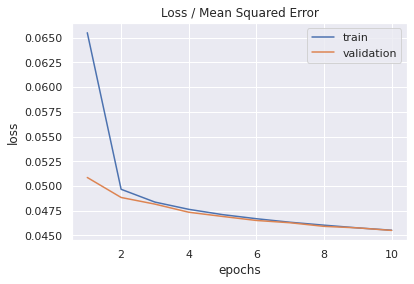

In [ ]:
model10 = Sequential()
model10.add(Dense(48, input_dim=12, activation="relu"))
model10.add(Dense(24, activation="relu"))
model10.add(Dense(24, activation="relu"))
model10.add(Dense(1, activation="relu"))

model10.summary()

model10.compile(optimizer="adagrad", loss='mse')

epochs=10

print('\nEntrenamiento: \n')
history = model10.fit(X_train, y_train, 
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    verbose=2)
print('---------------------------------------------------')

print('\nTesteo: \n')
test_loss = model10.evaluate(X_test, y_test)
print('\nTest loss:', "%.4f" %test_loss)
print('---------------------------------------------------')

compare_models["Modelo 10"] = {
        "Costo": round(test_loss,4),
        "Optimizador": "adagrad",
        "Capas": "4 - 48/24/24/1",
        "F. Activación": "r/r/r/r",
        "Epochs": 10,
        "Early Stopping": "No"}

print('\nGráfica del costo: \n')
plot_results()

### Modelo 11
Aumento en las épocas de entrenamiento y Early Stopping

El desempeño de los modelos 5 (op rmsprop) y 9 (op adam) es similar con una leve mejora en el valor de costo final para el 9.

El modelo 10 (op adagrad) presenta una disminución estable del valor del costo tanto en train como en test, pero para la misma cantidad de épocas que los demás su valor de costo final es significativamente mayor. 

Por ese mismo motivo, se decide seguir con el optimizador Adam, agregar mayor cantidad de épocas y probar incorporar early stopping en la función.

In [ ]:
stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=6, verbose=1, mode='auto')

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_84 (Dense)             (None, 48)                624       
_________________________________________________________________
dense_85 (Dense)             (None, 24)                1176      
_________________________________________________________________
dense_86 (Dense)             (None, 24)                600       
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 25        
Total params: 2,425
Trainable params: 2,425
Non-trainable params: 0
_________________________________________________________________

Entrenamiento: 

Epoch 1/30
6554/6554 - 19s - loss: 0.0411 - val_loss: 0.0406
Epoch 2/30
6554/6554 - 18s - loss: 0.0281 - val_loss: 0.0355
Epoch 3/30
6554/6554 - 18s - loss: 0.0258 - val_loss: 0.0231
Epoch 4/30
6554/6554 - 18s - loss: 0.0242 - val_

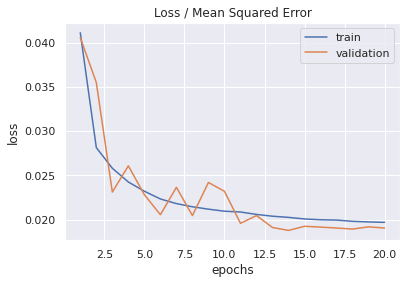

In [ ]:
model11 = Sequential()
model11.add(Dense(48, input_dim=12, activation="relu"))
model11.add(Dense(24, activation="relu"))
model11.add(Dense(24, activation="relu"))
model11.add(Dense(1, activation="relu"))

model11.summary()

model11.compile(optimizer="adam", loss='mse')

epochs=30

print('\nEntrenamiento: \n')
history = model11.fit(X_train, y_train, 
                    epochs=epochs,
                    validation_data=(X_val, y_val),
                    callbacks=stopper,
                    verbose=2)

print('\n---------------------------------------------------')

print('\nTesteo: \n')
test_loss = model11.evaluate(X_test, y_test)
print('\nTest loss:', "%.4f" %test_loss)

print('\n---------------------------------------------------')
compare_models["Modelo 11"] = {
        "Costo": round(test_loss,4),
        "Optimizador": "adam",
        "Capas": "4 - 48/24/24/1",
        "F. Activación": "r/r/r/r",
        "Epochs": 30,
        "Early Stopping": "Si"}

print('\nGráfica del costo: \n')
plot_results()

In [ ]:
df_models = pd.DataFrame([key for key in compare_models.keys()], columns=['Modelo'])
df_models['Optimizador'] = [value['Optimizador'] for value in compare_models.values()]
df_models['Capas'] = [value['Capas'] for value in compare_models.values()]
df_models['F. Activación'] = [value['F. Activación'] for value in compare_models.values()]
df_models['Epochs'] = [value['Epochs'] for value in compare_models.values()]
df_models['Early Stopping'] = [value['Early Stopping'] for value in compare_models.values()]
df_models['Costo'] = [value['Costo'] for value in compare_models.values()]
df_models

Modelo Optimizador             Capas F. Activación  Epochs  \
0    Modelo 1     RMSprop          2 - 24/1           r/r      10   
1    Modelo 2     RMSprop          2 - 48/1           r/r      10   
2    Modelo 3     RMSprop       3 - 48/24/1         r/r/r      10   
3    Modelo 4     RMSprop       3 - 48/24/1         r/t/r      10   
4    Modelo 5     RMSprop    4 - 48/24/24/1       r/r/r/r      10   
5    Modelo 6     RMSprop    4 - 48/24/24/1       r/t/t/r      10   
6    Modelo 8     RMSprop  4 - 512/128/24/1       r/r/r/r      10   
7    Modelo 9        adam    4 - 48/24/24/1       r/r/r/r      10   
8   Modelo 10     adagrad    4 - 48/24/24/1       r/r/r/r      10   
9   Modelo 11        adam    4 - 48/24/24/1       r/r/r/r      30   
10   Modelo 7     RMSprop    4 - 48/24/24/1       r/r/t/r      10   

   Early Stopping  Costo  
0              No  0.026  
1              No  0.029  
2              No  0.034  
3              No  0.022  
4              No  0.023  
5              No  0.021  
6              No  0.035  
7              No  0.021  
8              No  0.045  
9              Si  0.019  
10             No  0.025

Observamos el desempeño de cada uno de los modelos entrenados y es notable que el costo es menor para el caso 11, modelo de 4 capas con uns estructura de 48 neuronas en la primera, 24 en las dos siguientes y 1 en la de salida que contiene el valor del precio predicho.

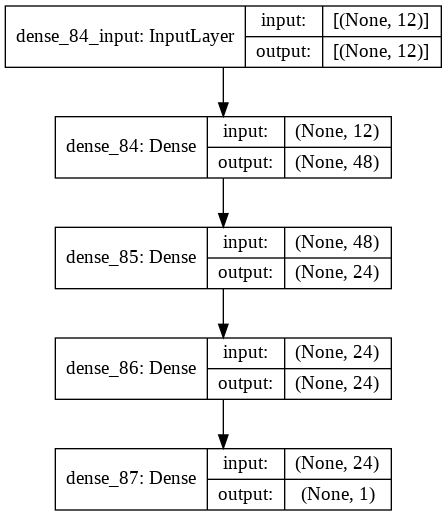

In [ ]:
plot_model(model11, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Resultados

###  Predicciones 

In [ ]:
predict = model11.predict(X_test)

In [215]:
# Precios reales y_test
minmax2.inverse_transform([y_test])

array([[38990.,  2000., 15000., ..., 23995., 40990.,  6450.]])

In [203]:
# Valores predichos Modelo 11
minmax2.inverse_transform(predict)

array([[39258.137 ],
       [ 3220.6543],
       [17083.564 ],
       ...,
       [21817.842 ],
       [33320.652 ],
       [ 5322.3784]], dtype=float32)

In [214]:
# Valores predichos Random Forest
minmax2.inverse_transform([y_pred])

array([[39590.    ,  2494.4   , 15329.7   , ..., 13570.975 , 39460.    ,
         6449.9125]])

### Conclusiones

In [ ]:
print('\tResultados Random Forest:')
print('\nMean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),4))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),4))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),4))
print("R2 score between test_labels and predictions is: {}".format(round(r2_score(y_test, y_pred),3)))
print('Model Score:',round(regressor.score(X_test,y_test)*100,4),'%')

	Resultados Random Forest:

Mean Absolute Error: 0.0489
Mean Squared Error: 0.0086
Root Mean Squared Error: 0.0925
R2 score between test_labels and predictions is: 0.868
Model Score: 86.839 %


In [ ]:
print('\tResultados ANN Modelo 11:')
print('\nMean Absolute Error:', round(metrics.mean_absolute_error(y_test, predict),4))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, predict),4))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, predict)),4))
print("R2 score between test_labels and predictions is: {}".format(round(r2_score(y_test, predict),3)))

	Resultados ANN Modelo 11:

Mean Absolute Error: 0.0965
Mean Squared Error: 0.0193
Root Mean Squared Error: 0.139
R2 score between test_labels and predictions is: 0.703


El modelo realizado con Aprendizaje Supervisado - Random Forest - presenta una mejor performance en cuanto a los resultados obtenidos con las predicciones. Posee menos MAE, MSE y RMSE, además, el valor de r2 para el mismo es mayor que para la Red Neuronal realizada con el Modelo 11.